In [2]:
# TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: ', st)

Last Run:  2016-01-15 00:08:53


# Showcase

## Tutorial: Basic

### User Input Startup

In [31]:
#------------------------------------------------------------------------------
import pandas as pd

import lamana as la
#import LamAna as la

%matplotlib inline
#%matplotlib nbagg
# PARAMETERS ------------------------------------------------------------------
# Build dicts of geometric and material parameters
load_params = {'R' : 12e-3,                                # specimen radius
               'a' : 7.5e-3,                               # support ring radius
               'r' : 2e-4,                                 # radial distance from center loading
               'P_a' : 1,                                  # applied load
               'p' : 5,                                    # points/layer
               }

# Quick Form: a dict of lists
mat_props = {'HA' : [5.2e10, 0.25],
             'PSu' : [2.7e9, 0.33],            
             }

# Standard Form: a dict of dicts
# mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
#              'Poissons': {'HA': 0.25, 'PSu': 0.33}}


# What geometries to test?
# Make tuples of desired geometeries to analyze: outer - {inner...-....}_i - middle

# Current Style
g1 = ('0-0-2000')                                          # Monolith
g2 = ('1000-0-0')                                          # Bilayer
g3 = ('600-0-800')                                         # Trilayer
g4 = ('500-500-0')                                         # 4-ply
g5 = ('400-200-800')                                       # Short-hand; <= 5-ply
g6 = ('400-200-400S')                                      # Symmetric
g7 = ('400-[200]-800')                                     # General convention; 5-ply 
g8 = ('400-[100,100]-800')                                 # General convention; 7-plys 
g9 = ('400-[100,100]-400S')                                # General and Symmetric convention; 7-plys 

'''Add to test set'''
g13 = ('400-[150,50]-800')                                 # Dissimilar inner_is     
g14 = ('400-[25,125,50]-800')                         


geos_most = [g1, g2, g3, g4, g5]
geos_special = [g6, g7, g8, g9]
geos_full = [g1, g2, g3, g4, g5, g6, g7, g8, g9]
geos_dissimilar = [g13, g14]

# Future Style
#geos1 = ((400-400-400),(400-200-800),(400-350-500))        # same total thickness
#geos2 = ((400-400-400), (400-500-1600), (400-200-800))     # same outer thickness

In [32]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions

Converting mat_props to Standard Form.


## Calling Case attributes

Passed in arguments are acessible, but can be displayed as pandas Series and DataFrames.

In [33]:
# Original
case1.load_params

{'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002}

In [34]:
# Series View
case1.parameters

P_a    1.0000
R      0.0120
a      0.0075
p      5.0000
r      0.0002
dtype: float64

In [35]:
# Original
case1.mat_props

defaultdict(<class 'dict'>, {'Poissons': {'HA': 0.25, 'PSu': 0.33}, 'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0}})

In [36]:
# DataFrame View
case1.properties

,Modulus,Poissons
materials,,
HA,52000000000,0.25
PSu,2700000000,0.33


In [37]:
# Equivalent Standard Form
case1.properties.to_dict()

{'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0},
 'Poissons': {'HA': 0.25, 'PSu': 0.33000000000000002}}

Reset material order.  Changes are relfected in the properties view and stacking order.

In [38]:
case1.materials = ['PSu', 'HA']
case1.properties

Overriding materials order...


,Modulus,Poissons
materials,,
PSu,2700000000,0.33
HA,52000000000,0.25


Serial resets

In [39]:
case1.materials = ['PSu', 'HA', 'HA']
case1.properties

Overriding materials order...


,Modulus,Poissons
materials,,
PSu,2700000000,0.33
HA,52000000000,0.25


In [40]:
case1.materials                                          # get reorderd list of materials

Getting materials...


['PSu', 'HA', 'HA']

In [41]:
case1._materials

['PSu', 'HA', 'HA']

In [42]:
case1.apply(geos_full) 

User input geometries have been converted and set to Case.


In [43]:
case1.snapshots[-1]

Accessing snapshot method.


,layer,side,matl,type,t(um)
0,1,Tens.,PSu,outer,400
1,2,Tens.,HA,inner,100
2,3,Tens.,HA,inner,100
3,4,INDET,PSu,middle,800
4,5,Comp.,HA,inner,100
5,6,Comp.,HA,inner,100
6,7,Comp.,PSu,outer,400


In [44]:
'''Need to bypass pandas abc ordering of indicies.'''

'Need to bypass pandas abc ordering of indicies.'

Reset the parameters

In [45]:
mat_props2 = {'HA' : [5.3e10, 0.25],
              'PSu' : [2.8e9, 0.33],            
             }

In [46]:
case1 = la.distributions.Case(load_params, mat_props2) 
case1.properties

Converting mat_props to Standard Form.


,Modulus,Poissons
materials,,
HA,53000000000,0.25
PSu,2800000000,0.33


## `apply()` Geometries and LaminateModels

Construct a laminate using geometric, matrial paramaters and geometries.

In [47]:
case2 = la.distributions.Case(load_params, mat_props) 
case2.apply(geos_full)                                     # default model Wilson_LT

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


Access the user input geometries

In [48]:
case2.Geometries                                           # using an attribute, __repr__

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S)]

In [49]:
print(case2.Geometries)                                    # uses __str__  

[Geometry object (0.0-[0.0]-2000.0), Geometry object (1000.0-[0.0]-0.0), Geometry object (600.0-[0.0]-800.0), Geometry object (500.0-[500.0]-0.0), Geometry object (400.0-[200.0]-800.0), Geometry object (400.0-[200.0]-400.0S), Geometry object (400.0-[200.0]-800.0), Geometry object (400.0-[100.0,100.0]-800.0), Geometry object (400.0-[100.0,100.0]-400.0S)]


In [50]:
case2.Geometries[0]                                        # indexing

Geometry object (0.0-[0.0]-2000.0)

We can compare Geometry objects with builtin Python operators.  This process  directly compares GeometryTuples in the `Geometry` class.

In [51]:
bilayer = case2.Geometries[1]                              # (1000.0-[0.0]-0.0)       
trilayer = case2.Geometries[2]                             # (600.0-[0.0]-800.0)        
#bilayer == trilayer
bilayer != trilayer

True

Get all thicknesses for selected layers.

In [52]:
case2.middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 400.0, 800.0, 800.0, 400.0]

In [53]:
case2.inner

[[0.0],
 [0.0],
 [0.0],
 [500.0],
 [200.0],
 [200.0],
 [200.0],
 [100.0, 100.0],
 [100.0, 100.0]]

In [54]:
case2.inner[-1]

[100.0, 100.0]

In [55]:
case2.inner[-1][0]                                         # List indexing allowed  

100.0

In [56]:
[first[0] for first in case2.inner]                        # iterate  

[0.0, 0.0, 0.0, 500.0, 200.0, 200.0, 200.0, 100.0, 100.0]

In [57]:
case2.outer

[0.0, 1000.0, 600.0, 500.0, 400.0, 400.0, 400.0, 400.0, 400.0]

A general and very important object is the LaminateModel.

In [58]:
case2.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>]

Sometimes might you want to throw in a bunch of geometry strings from different groups.  If there are repeated strings in different groups (set intersections), you can tell `Case` to only give a unique result. 

For instane, here we combine two groups of geometry strings, 5-plys and odd-plys.  Clearly these two groups overlap, and there are some repeated geometries (one with different conventions).  Using the `unique` keyword, Case only operates on a unique set of `Geometry` objects (independent of convention), resulting in a unique set of LaminateModels. 

In [59]:
fiveplys = ['400-[200]-800', '350-400-500', '200-100-1400']
oddplys = ['400-200-800', '350-400-500', '400.0-[100.0,100.0]-800.0']
mix = fiveplys + oddplys
mix

['400-[200]-800',
 '350-400-500',
 '200-100-1400',
 '400-200-800',
 '350-400-500',
 '400.0-[100.0,100.0]-800.0']

In [60]:
# Non-unique, repeated 5-plys 
case_ = la.distributions.Case(load_params, mat_props) 
case_.apply(mix)
case_.LMs

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


[<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>]

In [61]:
# Unique 
case_ = la.distributions.Case(load_params, mat_props) 
case_.apply(mix, unique=True)
case_.LMs

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


[<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>]

## DataFrame Access

You can get a quick view of the stack using the `snapshot` method.  This gives access to a `Construct` - a DataFrame converted stack.

In [62]:
case2.snapshots[-1]

Accessing snapshot method.


,layer,side,matl,type,t(um)
0,1,Tens.,HA,outer,400
1,2,Tens.,PSu,inner,100
2,3,Tens.,HA,inner,100
3,4,INDET,PSu,middle,800
4,5,Comp.,HA,inner,100
5,6,Comp.,PSu,inner,100
6,7,Comp.,HA,outer,400


We can easily view entire laminate DataFrames using the `frames` attribute.  This gives access to `LaminateModels` (DataFrame) objects, which extends the stack view so that laminate theory is applied to each row.

In [63]:
'''Consider head command for frames list'''

'Consider head command for frames list'

In [64]:
#case2.frames

In [65]:
##with pd.set_option('display.max_columns', None):           # display all columns, within this context manager 
##    case2.frames[5]

In [66]:
case2.frames[5].head()

Accessing frames method.


,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,400,0.0004,0.0000,1,1.00,...,0.00080,5.546667e+10,1.386667e+10,14.495289,3.623822,0.000003,0.000006,274182.824310,378730.662983,0.378731
1,1,Tens.,outer,HA,internal,400,0.0004,0.0001,1,1.25,...,0.00075,5.546667e+10,1.386667e+10,11.957689,2.989422,0.000003,0.000005,246764.541879,340857.596685,0.340858
2,1,Tens.,outer,HA,internal,400,0.0004,0.0002,1,1.50,...,0.00070,5.546667e+10,1.386667e+10,9.669689,2.417422,0.000003,0.000005,219346.259448,302984.530386,0.302985
3,1,Tens.,outer,HA,internal,400,0.0004,0.0003,1,1.75,...,0.00065,5.546667e+10,1.386667e+10,7.631289,1.907822,0.000002,0.000004,191927.977017,265111.464088,0.265111
4,1,Tens.,outer,HA,discont.,400,0.0002,0.0004,1,2.00,...,0.00060,5.546667e+10,1.386667e+10,2.810311,0.702578,0.000002,0.000004,164509.694586,227238.397790,0.227238


In [67]:
'''Extend laminate attributes'''

'Extend laminate attributes'

In [68]:
case3 = la.distributions.Case(load_params, mat_props) 
case3.apply(geos_dissimilar)
#case3.frames

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


NOTE, for even plies, the material is set alternate for each layer.  Thus outers layers may be different materials.

In [69]:
case4 = la.distributions.Case(load_params, mat_props) 
case4.apply(['400-[100,100,100]-0'])
case4.frames[0][['layer', 'matl', 'type']]
;

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Accessing frames method.


''

In [70]:
'''Add functionality to customize material type.'''

'Add functionality to customize material type.'

### Totaling

The `distributions.Case` class has useful properties available for totaling specific layers for a group of laminates as lists.  As these properties return lists, these results can be **sliced** and **iterated**.

In [71]:
'''Show Geometry first then case use.'''

'Show Geometry first then case use.'

#### `.total` property

In [72]:
case2.total

[2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0]

In [73]:
case2.total_middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [74]:
case2.total_middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [75]:
case2.total_inner_i

[[0.0],
 [0.0],
 [0.0],
 [1000.0],
 [400.0],
 [400.0],
 [400.0],
 [200.0, 200.0],
 [200.0, 200.0]]

In [76]:
case2.total_outer

[0.0, 2000.0, 1200.0, 1000.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [77]:
case2.total_outer[4:-1]                                    # slicing   

[800.0, 800.0, 800.0, 800.0]

In [78]:
[inner_i[-1]/2.0 for inner_i in case2.total_inner_i]       # iterate                                                                               

[0.0, 0.0, 0.0, 500.0, 200.0, 200.0, 200.0, 100.0, 100.0]

#### Geometry Totals

The total attribute used in Case actually dervive from attributes for Geometry objects individually.  On Geometry objects, they return specific thicknesses instead of lists of thicknesses.

In [79]:
G1 = case2.Geometries[-1]
G1

Geometry object (400.0-[100.0,100.0]-400.0S)

In [80]:
G1.total                                                   # laminate thickness (um)

2000.0

In [81]:
G1.total_inner_i                                           # inner_i laminae

[200.0, 200.0]

In [82]:
G1.total_inner_i[0]                                        # inner_i lamina pair

200.0

In [83]:
sum(G1.total_inner_i)                                      # inner total

400.0

In [84]:
G1.total_inner                                             # inner total

400.0

### LaminateModel Attributes

Access the LaminateModel object directly using the `LMs` attribute.

In [85]:
case2.LMs[5].Middle

,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
10,3,Tens.,middle,HA,interface,800,0.0004,0.0006,3,3.00,...,0.0002,5.546667e+10,1.386667e+10,1.183289,0.295822,1.380770e-06,0.000002,109673.129724,151492.265193,0.151492
11,3,Tens.,middle,HA,internal,800,0.0004,0.0008,3,3.25,...,0.0001,5.546667e+10,1.386667e+10,0.517689,0.129422,6.903852e-07,0.000001,54836.564862,75746.132597,0.075746
12,3,None,middle,HA,neut. axis,800,0.0004,0.0010,NaN,3.50,...,0.0000,5.546667e+10,1.386667e+10,0.295822,0.073956,0.000000e+00,0.000000,0.000000,0.000000,0.000000
13,3,Comp.,middle,HA,internal,800,0.0004,0.0012,4,3.75,...,-0.0001,5.546667e+10,1.386667e+10,0.517689,0.129422,-6.903852e-07,-0.000001,-54836.564862,-75746.132597,-0.075746
14,3,Comp.,middle,HA,interface,800,0.0004,0.0014,4,4.00,...,-0.0002,5.546667e+10,1.386667e+10,1.183289,0.295822,-1.380770e-06,-0.000002,-109673.129724,-151492.265193,-0.151492


In [86]:
case2.LMs[5].Inner_i

,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
5,2,Tens.,inner,PSu,interface,200,0.0002,0.00040,2,2.00,...,0.000500,3.029963e+09,9.998878e+08,0.153518,0.050661,0.000002,0.000004,9854.180547,12915.334007,0.012915
6,2,Tens.,inner,PSu,internal,200,0.0002,0.00045,2,2.25,...,0.000475,3.029963e+09,9.998878e+08,0.111477,0.036788,0.000002,0.000003,9032.998835,11839.056173,0.011839
7,2,Tens.,inner,PSu,internal,200,0.0002,0.00050,2,2.50,...,0.000450,3.029963e+09,9.998878e+08,0.076254,0.025164,0.000002,0.000003,8211.817122,10762.778339,0.010763
8,2,Tens.,inner,PSu,internal,200,0.0002,0.00055,2,2.75,...,0.000425,3.029963e+09,9.998878e+08,0.047848,0.015790,0.000002,0.000003,7390.635410,9686.500505,0.009687
9,2,Tens.,inner,PSu,discont.,200,0.0004,0.00060,2,3.00,...,0.000400,3.029963e+09,9.998878e+08,0.064639,0.021331,0.000001,0.000002,6569.453698,8610.222671,0.008610
15,4,Comp.,inner,PSu,discont.,200,0.0004,0.00140,5,4.00,...,-0.000400,3.029963e+09,9.998878e+08,0.064639,0.021331,-0.000001,-0.000002,-6569.453698,-8610.222671,-0.008610
16,4,Comp.,inner,PSu,internal,200,0.0002,0.00145,5,4.25,...,-0.000425,3.029963e+09,9.998878e+08,0.047848,0.015790,-0.000002,-0.000003,-7390.635410,-9686.500505,-0.009687
17,4,Comp.,inner,PSu,internal,200,0.0002,0.00150,5,4.50,...,-0.000450,3.029963e+09,9.998878e+08,0.076254,0.025164,-0.000002,-0.000003,-8211.817122,-10762.778339,-0.010763
18,4,Comp.,inner,PSu,internal,200,0.0002,0.00155,5,4.75,...,-0.000475,3.029963e+09,9.998878e+08,0.111477,0.036788,-0.000002,-0.000003,-9032.998835,-11839.056173,-0.011839
19,4,Comp.,inner,PSu,interface,200,0.0002,0.00160,5,5.00,...,-0.000500,3.029963e+09,9.998878e+08,0.153518,0.050661,-0.000002,-0.000004,-9854.180547,-12915.334007,-0.012915


Laminates are assumed mirrored at the neutral axis, but dissimilar inner_i thicknesses are allowed.

In [87]:
case2.LMs[5].tensile

,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,400,0.0004,0.00000,1,1.00,...,0.000800,5.546667e+10,1.386667e+10,14.495289,3.623822,3.451926e-06,0.000006,274182.824310,378730.662983,0.378731
1,1,Tens.,outer,HA,internal,400,0.0004,0.00010,1,1.25,...,0.000750,5.546667e+10,1.386667e+10,11.957689,2.989422,3.106734e-06,0.000005,246764.541879,340857.596685,0.340858
2,1,Tens.,outer,HA,internal,400,0.0004,0.00020,1,1.50,...,0.000700,5.546667e+10,1.386667e+10,9.669689,2.417422,2.761541e-06,0.000005,219346.259448,302984.530386,0.302985
3,1,Tens.,outer,HA,internal,400,0.0004,0.00030,1,1.75,...,0.000650,5.546667e+10,1.386667e+10,7.631289,1.907822,2.416348e-06,0.000004,191927.977017,265111.464088,0.265111
4,1,Tens.,outer,HA,discont.,400,0.0002,0.00040,1,2.00,...,0.000600,5.546667e+10,1.386667e+10,2.810311,0.702578,2.071156e-06,0.000004,164509.694586,227238.397790,0.227238
5,2,Tens.,inner,PSu,interface,200,0.0002,0.00040,2,2.00,...,0.000500,3.029963e+09,9.998878e+08,0.153518,0.050661,2.071156e-06,0.000004,9854.180547,12915.334007,0.012915
6,2,Tens.,inner,PSu,internal,200,0.0002,0.00045,2,2.25,...,0.000475,3.029963e+09,9.998878e+08,0.111477,0.036788,1.898559e-06,0.000003,9032.998835,11839.056173,0.011839
7,2,Tens.,inner,PSu,internal,200,0.0002,0.00050,2,2.50,...,0.000450,3.029963e+09,9.998878e+08,0.076254,0.025164,1.725963e-06,0.000003,8211.817122,10762.778339,0.010763
8,2,Tens.,inner,PSu,internal,200,0.0002,0.00055,2,2.75,...,0.000425,3.029963e+09,9.998878e+08,0.047848,0.015790,1.553367e-06,0.000003,7390.635410,9686.500505,0.009687
9,2,Tens.,inner,PSu,discont.,200,0.0004,0.00060,2,3.00,...,0.000400,3.029963e+09,9.998878e+08,0.064639,0.021331,1.380770e-06,0.000002,6569.453698,8610.222671,0.008610


Separate from the case attributes, Laminates have useful attributes also, such as `nplies`, `p` and its own `total`.

In [88]:
LM = case2.LMs[4]
LM.LMFrame.tail(7)

,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
18,4,Comp.,inner,PSu,internal,200,0.0002,0.00155,5,4.75,...,-0.000475,3.029963e+09,9.998878e+08,0.111477,0.036788,-0.000002,-0.000003,-9032.998835,-11839.056173,-0.011839
19,4,Comp.,inner,PSu,interface,200,0.0002,0.00160,5,5.00,...,-0.000500,3.029963e+09,9.998878e+08,0.153518,0.050661,-0.000002,-0.000004,-9854.180547,-12915.334007,-0.012915
20,5,Comp.,outer,HA,discont.,400,0.0002,0.00160,6,5.00,...,-0.000600,5.546667e+10,1.386667e+10,2.810311,0.702578,-0.000002,-0.000004,-164509.694586,-227238.397790,-0.227238
21,5,Comp.,outer,HA,internal,400,0.0004,0.00170,6,5.25,...,-0.000650,5.546667e+10,1.386667e+10,7.631289,1.907822,-0.000002,-0.000004,-191927.977017,-265111.464088,-0.265111
22,5,Comp.,outer,HA,internal,400,0.0004,0.00180,6,5.50,...,-0.000700,5.546667e+10,1.386667e+10,9.669689,2.417422,-0.000003,-0.000005,-219346.259448,-302984.530386,-0.302985
23,5,Comp.,outer,HA,internal,400,0.0004,0.00190,6,5.75,...,-0.000750,5.546667e+10,1.386667e+10,11.957689,2.989422,-0.000003,-0.000005,-246764.541879,-340857.596685,-0.340858
24,5,Comp.,outer,HA,interface,400,0.0004,0.00200,6,6.00,...,-0.000800,5.546667e+10,1.386667e+10,14.495289,3.623822,-0.000003,-0.000006,-274182.824310,-378730.662983,-0.378731


Often the extreme stress values (those at the interfaces) are most important.  This is equivalent to p=2.

In [89]:
LM.extrema

,layer,side,type,matl,label,t(um),h(m),d(m),intf,k,...,z(m)*,Q_11,Q_12,D_11,D_12,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,400,0.0004,0.0000,1,1,...,0.0008,5.546667e+10,1.386667e+10,14.495289,3.623822,0.000003,0.000006,274182.824310,378730.662983,0.378731
4,1,Tens.,outer,HA,discont.,400,0.0002,0.0004,1,2,...,0.0006,5.546667e+10,1.386667e+10,2.810311,0.702578,0.000002,0.000004,164509.694586,227238.397790,0.227238
5,2,Tens.,inner,PSu,interface,200,0.0002,0.0004,2,2,...,0.0005,3.029963e+09,9.998878e+08,0.153518,0.050661,0.000002,0.000004,9854.180547,12915.334007,0.012915
9,2,Tens.,inner,PSu,discont.,200,0.0004,0.0006,2,3,...,0.0004,3.029963e+09,9.998878e+08,0.064639,0.021331,0.000001,0.000002,6569.453698,8610.222671,0.008610
10,3,Tens.,middle,HA,interface,800,0.0004,0.0006,3,3,...,0.0002,5.546667e+10,1.386667e+10,1.183289,0.295822,0.000001,0.000002,109673.129724,151492.265193,0.151492
14,3,Comp.,middle,HA,interface,800,0.0004,0.0014,4,4,...,-0.0002,5.546667e+10,1.386667e+10,1.183289,0.295822,-0.000001,-0.000002,-109673.129724,-151492.265193,-0.151492
15,4,Comp.,inner,PSu,discont.,200,0.0004,0.0014,5,4,...,-0.0004,3.029963e+09,9.998878e+08,0.064639,0.021331,-0.000001,-0.000002,-6569.453698,-8610.222671,-0.008610
19,4,Comp.,inner,PSu,interface,200,0.0002,0.0016,5,5,...,-0.0005,3.029963e+09,9.998878e+08,0.153518,0.050661,-0.000002,-0.000004,-9854.180547,-12915.334007,-0.012915
20,5,Comp.,outer,HA,discont.,400,0.0002,0.0016,6,5,...,-0.0006,5.546667e+10,1.386667e+10,2.810311,0.702578,-0.000002,-0.000004,-164509.694586,-227238.397790,-0.227238
24,5,Comp.,outer,HA,interface,400,0.0004,0.0020,6,6,...,-0.0008,5.546667e+10,1.386667e+10,14.495289,3.623822,-0.000003,-0.000006,-274182.824310,-378730.662983,-0.378731


In [90]:
LM.p                                                       # number of rows per group

5

In [91]:
LM.nplies                                                  # number of plies

5

In [92]:
LM.total                                                   # total laminate thickness (m)

0.002

In [93]:
LM.Geometry

Geometry object (400.0-[200.0]-800.0)

In [94]:
'''Overload the min and max special methods.'''

'Overload the min and max special methods.'

In [95]:
LM.max_stress                                             # max interfacial failure stress

0     0.378731
5     0.012915
10    0.151492
14   -0.151492
19   -0.012915
24   -0.378731
Name: stress_f (MPa/N), dtype: float64

NOTE: this feature gives a different result for p=1 since a single middle cannot report two interfacial values; INDET.

In [96]:
LM.min_stress 

4     0.227238
9     0.008610
15   -0.008610
20   -0.227238
Name: stress_f (MPa/N), dtype: float64

In [97]:
'''Redo tp return series of bool an index for has_attrs'''

'Redo tp return series of bool an index for has_attrs'

In [98]:
LM.has_neutaxis;

In [99]:
LM.has_discont;

In [100]:
LM.is_special

False

In [101]:
LM.FeatureInput

{'Geometry': Geometry object (400.0-[200.0]-800.0),
 'Globals': {'D_11T': 31.664191802890315,
  'D_11p': 0.033700807714524279,
  'D_12T': 7.9406108505093584,
  'D_12n': -0.0084513446948124519,
  'K_r': 0.0034519261262397653,
  'K_t:': 0.0059650953251038216,
  'M_r': 0.15666895161350616,
  'M_t': 0.216290324549788,
  'v_eq ': 0.25077573114575868},
 'Materials': ['HA', 'PSu'],
 'Model': 'Wilson_LT',
 'Parameters': {'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002},
 'Properties': defaultdict(<class 'dict'>, {'Poissons': {'HA': 0.25, 'PSu': 0.33}, 'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0}})}

In [102]:
'''Need to fix FeatureInput and Geometry inside LaminateModel'''

'Need to fix FeatureInput and Geometry inside LaminateModel'

As with Geometry objects, we can compare LaminateModel objects also.  ~~This process directly compares two defining components of a LaminateModel object: the LM DataFrame (`LMFrame`) and FeatureInput.  If either is False, the equality returns `False`.~~

In [103]:
case2 = la.distributions.Case(load_params, mat_props) 
case2.apply(geos_full) 

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


In [104]:
bilayer_LM = case2.LMs[1]
trilayer_LM = case2.LMs[2]
trilayer_LM == trilayer_LM
#bilayer_LM == trilayer_LM

True

In [105]:
bilayer_LM != trilayer_LM

True

Use python and pandas native comparison tracebacks that to understand the errors directly by comparing FeatureInput dict and LaminateModel DataFrame.

In [106]:
#bilayer_LM.FeatureInput == trilayer_LM.FeatureInput    # gives detailed traceback

In [107]:
'''Fix FI DataFrame with dict.'''

'Fix FI DataFrame with dict.'

In [108]:
bilayer_LM.FeatureInput

{'Geometry': Geometry object (1000.0-[0.0]-0.0),
 'Globals': {'D_11T': 19.498876544595319,
  'D_11p': 0.054826177209184083,
  'D_12T': 4.9555181486053437,
  'D_12n': -0.013933731800259629,
  'K_r': 0.0055968142719747937,
  'K_t:': 0.009677945375294943,
  'M_r': 0.15709082448075087,
  'M_t': 0.21644417677735781,
  'v_eq ': 0.25414377783621128},
 'Materials': ['HA', 'PSu'],
 'Model': 'Wilson_LT',
 'Parameters': {'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002},
 'Properties': defaultdict(<class 'dict'>, {'Poissons': {'HA': 0.25, 'PSu': 0.33}, 'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0}})}

In [109]:
#bilayer_LM.LMFrame == trilayer_LM.LMFrame                # gives detailed traceback

## `plot()` LT Geometries

CAVEAT: it is recommended to use at least p=2 for calculating stress. Less than two points for odd plies is indeterminant in middle rows, which can raise exceptions.

In [110]:
'''Find a way to remove all but interfacial points.'''

'Find a way to remove all but interfacial points.'

We try to quickly plot simple stress distriubtions with native pandas methods. We have two variants for displaying distributions:

    - Unnoormalized: plotted by the height (`d_`). Visaully: thicknesses vary, material slopes are constant. 
    - Normalized: plotted by the relative fraction level (`k_`). Visually: thicknesses are constant, material slopes vary.
    
Here we plot with the nbagg matplotlib backend to generatre interactive figures.  NOTE: for Normalized plots, slope can vary for a given material. 

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


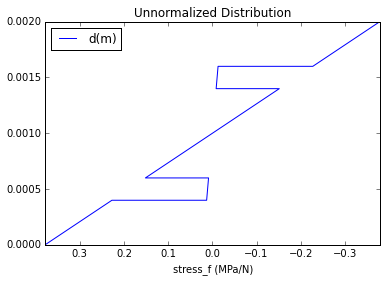

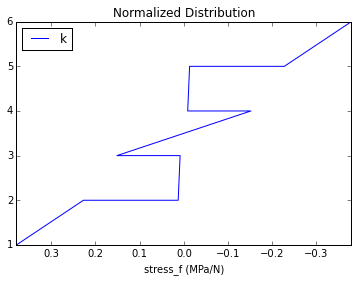

In [111]:
from lamana.utils import tools as ut
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
#%matplotlib nbagg

# Quick plotting
case4 = ut.laminator(dft.geos_standard)
for case in case4.values():
    for LM in case.LMs:
        df = LM.LMFrame
        
df.plot(x='stress_f (MPa/N)', y='d(m)', title='Unnormalized Distribution')
df.plot(x='stress_f (MPa/N)', y='k', title='Normalized Distribution')

While we get reasonable stress distribution plots rather simply, LamAna offers some plotting methods pertinent to laminates than assisting with visualization.

Demo - An example illustration of desired plotting of multiple geometries from `distributions`.

![demo](./LamAna/images/demo plot.png)



We can plot the stress distribution for a case of a single geometry.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


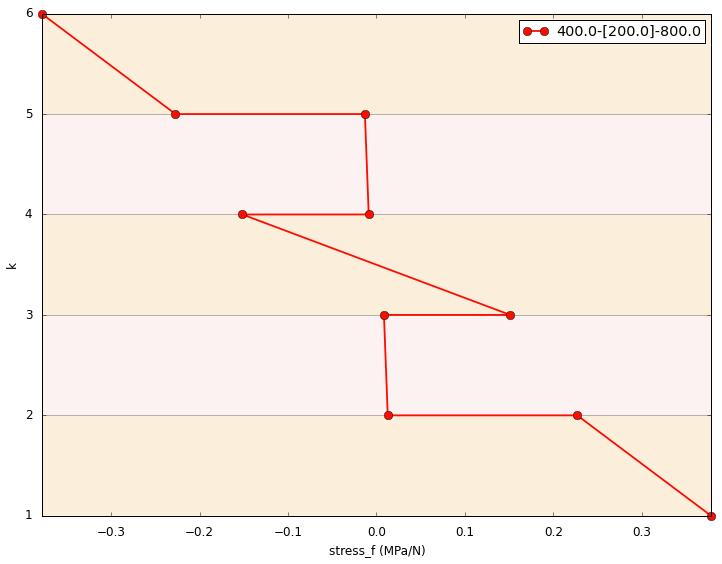

In [112]:
case3 = la.distributions.Case(load_params, mat_props) 
case3.apply(['400-200-800'], model='Wilson_LT')
case3.plot()

We can also plot multiple geometries of similar total thickness.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


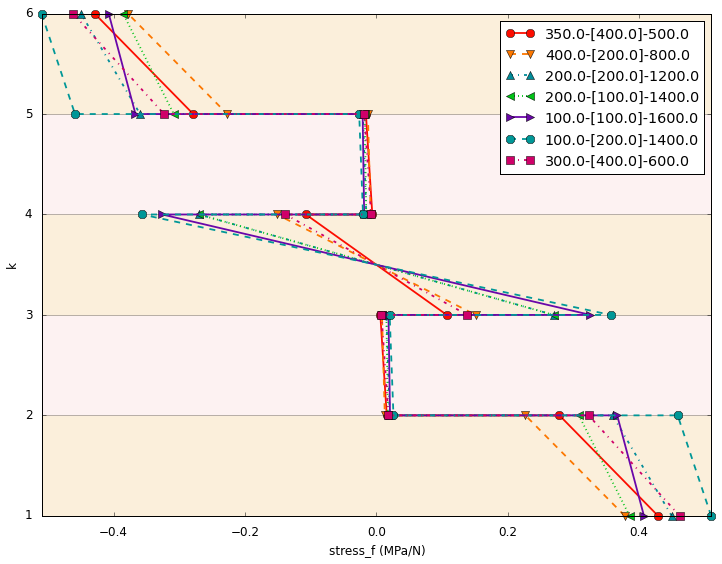

In [113]:
five_plies = ['350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
              '100-100-1600', '100-200-1400', '300-400-600']

case4 = la.distributions.Case(load_params, mat_props) 
case4.apply(five_plies, model='Wilson_LT')
case4.plot()

In [114]:
'''If different plies or patterns, make new caselet (subplot)'''
'''[400-200-800, '300-[400,200]-600']            # non-congruent? equi-ply'''
'''[400-200-800, '400-200-0']                    # odd/even ply'''
# currently superimposes plots.  Just needs to separate.

"[400-200-800, '400-200-0']                    # odd/even ply"

## Tutorial: Intermediate

So far, the barebones objects have been discussed and a lot can be accomplished with the basics.  For users who have a a little knowledge in Python and Pandas, here are some intermeadiate techniques to a customize repetitious actions.

This section dicusses use of abstract base classes designed for reducing redundant tasks such as multiple case creation, parameter definitions.  Custom model subclassing is all discussed.

In [115]:
#------------------------------------------------------------------------------
import pandas as pd

import lamana as la

%matplotlib inline
#%matplotlib nbagg
# PARAMETERS ------------------------------------------------------------------
# Build dicts of loading parameters and and material properties
load_params = {'R' : 12e-3,                                # specimen radius
               'a' : 7.5e-3,                               # support ring radius
               'r' : 2e-4,                                 # radial distance from center loading
               'P_a' : 1,                                  # applied load
               'p' : 5,                                    # points/layer
               }

# # Quick Form: a dict of lists
# mat_props = {'HA' : [5.2e10, 0.25],
#              'PSu' : [2.7e9, 0.33],}

# Standard Form: a dict of dicts
mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
             'Poissons': {'HA': 0.25, 'PSu': 0.33}}


# What geometries to test?
# Make tuples of desired geometeries to analyze: outer - {inner...-....}_i - middle

# Current Style
g1 = ('0-0-2000')                                          # Monolith
g2 = ('1000-0-0')                                          # Bilayer
g3 = ('600-0-800')                                         # Trilayer
g4 = ('500-500-0')                                         # 4-ply
g5 = ('400-200-800')                                       # Short-hand; <= 5-ply
g6 = ('400-200-400S')                                      # Symmetric
g7 = ('400-[200]-800')                                     # General convention; 5-ply 
g8 = ('400-[100,100]-800')                                 # General convention; 7-plys 
g9 = ('400-[100,100]-400S')                                # General and Symmetric convention; 7-plys 

'''Add to test set'''
g13 = ('400-[150,50]-800')                                 # Dissimilar inner_is     
g14 = ('400-[25,125,50]-800')                         


geos_most = [g1, g2, g3, g4, g5]
geos_special = [g6, g7, g8, g9]
geos_full = [g1, g2, g3, g4, g5, g6, g7, g8, g9]
geos_dissimilar = [g13, g14]

## Generating Multiple Cases

Sometimes it is necessary to generate differnet cases, which can be tedious with three lines of code per case from the prior section.  A simple way to produce more cases is to instantiate a `Cases` object. 

In [116]:
cases1 = la.distributions.Cases(['400-200-800', '350-400-500', 
                                 '400-200-0', '1000-0-0'],
                                load_params=load_params,
                                mat_props=mat_props, model= 'Wilson_LT',
                                ps=[3,4,5]) 
cases1

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


<lamana.distributions.Cases object at 0x0000000009164630>, {0: <<class 'lamana.distributions.Case'> p=3, size=1>, 1: <<class 'lamana.distributions.Case'> p=3, size=1>, 2: <<class 'lamana.distributions.Case'> p=3, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=4, size=1>, 5: <<class 'lamana.distributions.Case'> p=4, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=5, size=1>, 9: <<class 'lamana.distributions.Case'> p=5, size=1>, 10: <<class 'lamana.distributions.Case'> p=5, size=1>, 11: <<class 'lamana.distributions.Case'> p=5, size=1>}

`Cases()` accepts a list of geometry strings. Given appropriate default keywords, this lone argument will return a dict-like object of cases with indicies as keys. The `model` and `ps` keywords have default values.

A `Cases()` object has some interesting characteristics:

- slicelable
- viewable: contained LaminateModels
- iterable: by values
- writable
- selectable: unique subsets

In [117]:
# Sliceable
cases1[0]
cases1[0:2]

[<<class 'lamana.distributions.Case'> p=3, size=1>,
 <<class 'lamana.distributions.Case'> p=3, size=1>]

In [118]:
# Viewable
cases1.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>]

In [119]:
# Iterable
for i, case in enumerate(cases1):                        # __iter__ values
    print(case)
    #print(case.LMs)                                      # access LaminateModels

<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>


In [120]:
# Writable
#cases1.to_csv()                                          # write to file

In [121]:
# Selectable
cases1.select(nplies=[2,4])                               # by # plies
cases1.select(ps=[3,4])                                   # by points/DataFrame rows
cases1.select(nplies=[2,4], ps=[3,4], how='intersection') # by set operations 

{<lamana LaminateModel object (400.0-[200.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=4>}

Unique subsets of LaminateModels can  be returned from a mix of repeated  geometry strings.  We will use the default `model` and `ps` values.

In [122]:
set(geos_most).issubset(geos_full)                        # confirm repeats 

True

In [123]:
mix = geos_full + geos_most                               # contains repeats

In [124]:
# Repeated Subset
cases2 = la.distributions.Cases(mix, load_params=load_params, mat_props=mat_props) 
cases2.LMs

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

In [125]:
# Unique Subset
cases2 = la.distributions.Cases(mix, load_params=load_params, mat_props=mat_props,
                                unique=True) 
cases2.LMs

Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied.

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

## Subclassing Custom Default Parameters

We observed the benefits of using *implicit*, default keywords (`models`, `ps`) in simplifying the writing of `Cases()` instantiations.  In general, the user can code *explicit* defaults for `load_params` and `mat_props` by subclassing `BaseDefaults()` from `inputs_`.  While subclassing requires some extra Python knowledge, this is a relatively simple process that reduces a significant amount of redundant code, leading to a more effiencient anaytical setting. 

The `BaseDefaults` contains a dict various geometry strings and Geometry objects.  Rather than defining examples for various geometry plies, the user can call from all or a groupings of geometries.

In [126]:
from lamana.input_ import BaseDefaults

bdft = BaseDefaults()

# geometry String Attributes
bdft.geo_inputs                                           # all dict key-values
bdft.geos_all                                             # all geo strings
bdft.geos_standard                                        # static
bdft.geos_sample                                          # active; grows

# Geometry Object Attributes; mimics latter
bdft.Geo_objects                                          # all dict key-values
bdft.Geos_all                                             # all Geo objects
# more ...

# Custom FeatureInputs
#bdft.get_FeatureInput()                                   # quick builds  
#bdft.get_materials()                                      # convert to std. form

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0,100.0]-800.0)]

The latter geometric defaults come out of the box when subclassed from `BaseDefaults`.  If custom geometries are desired, the user can override the `geo_inputs` dict, which automatically builds the `Geo_objects` dict.

Users can override three categories of defaults parameters:

1. geometric variables
1. loading parameters
1. material properties

As mentioned, some geometric variables are provided for general laminate dimensions.  The other parameters cannot be predicted and need to be defined by the user. Below is an example of a Defaults() subclass.  If a custom model has been implemented (see next section), it is convention to place `Defaults()` and all other custom code within this module.  If a custom model is implemented an located in the models directory, Cases will automatically search will the designated model modules, locate the `load_params` and `mat_props` attributes and load them automatically for all `Cases` instantiations.

In [127]:
# Example Defaults from LamAna.models.Wilson_LT
class Defaults(BaseDefaults):
    '''Return parameters for building distributions cases.  Useful for consistent 
    testing.
    
    Dimensional defaults are inheirited from utils.BaseDefaults().  
    Material-specific parameters are defined here by he user.
    
    - Default geometric and materials parameters
    - Default FeatureInputs
    
    Examples
    ========
    >>>dft = Defaults()
    >>>dft.load_params
    {'R' : 12e-3, 'a' : 7.5e-3, 'p' : 1, 'P_a' : 1, 'r' : 2e-4,}
    
    >>>dft.mat_props
    {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
    'Poissons': {'HA': 0.25, 'PSu': 0.33}}
    
    >>>dft.FeatureInput
     {'Geometry' : '400-[200]-800',
      'Geometric' : {'R' : 12e-3, 'a' : 7.5e-3, 'p' : 1, 'P_a' : 1, 'r' : 2e-4,},
      'Materials' : {'HA' : [5.2e10, 0.25], 'PSu' : [2.7e9, 0.33],},
      'Custom' : None,
      'Model' : Wilson_LT,
     }

    '''
    def __init__(self):
        BaseDefaults.__init__(self)
        '''DEV: Add defaults first.  Then adjust attributes.'''
        # DEFAULTS ------------------------------------------------------------
        # Build dicts of geometric and material parameters
        self.load_params = {'R' : 12e-3,                   # specimen radius
                            'a' : 7.5e-3,                  # support ring radius
                            'p' : 5,                       # points/layer
                            'P_a' : 1,                     # applied load 
                            'r' : 2e-4,                    # radial distance from center loading
                            }

        self.mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
                           'Poissons': {'HA': 0.25, 'PSu': 0.33}}
        
        # ATTRIBUTES ----------------------------------------------------------                
        # FeatureInput
        self.FeatureInput = self.get_FeatureInput(self.Geo_objects['standard'][0], 
                                             load_params=self.load_params,
                                             mat_props=self.mat_props,
                                             ##custom_matls=None,
                                             model='Wilson_LT',
                                             global_vars=None)    

In [128]:
'''Use Classic_LT here'''

'Use Classic_LT here'

In [129]:
from lamana.distributions import Cases
# Auto load_params and mat_params

dft = Defaults()
cases3 = Cases(dft.geos_full, model='Wilson_LT')
#cases3 = la.distributions.Cases(dft.geos_full, model='Wilson_LT')
cases3

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


<lamana.distributions.Cases object at 0x000000000A76D978>, {0: <<class 'lamana.distributions.Case'> p=5, size=1>, 1: <<class 'lamana.distributions.Case'> p=5, size=1>, 2: <<class 'lamana.distributions.Case'> p=5, size=1>, 3: <<class 'lamana.distributions.Case'> p=5, size=1>, 4: <<class 'lamana.distributions.Case'> p=5, size=1>, 5: <<class 'lamana.distributions.Case'> p=5, size=1>, 6: <<class 'lamana.distributions.Case'> p=5, size=1>, 7: <<class 'lamana.distributions.Case'> p=5, size=1>}

In [130]:
'''Refine idiom for importing Cases '''

'Refine idiom for importing Cases '

## Subclassing Custom Models

One of the most powerful feauteres of LamAna is the ability to define customized modifications to the Laminate Theory models.

Code for laminate theories (i.e. Classic_LT, Wilson_LT) are are located in the models directory.  These models can be simple functions or sublclass from `BaseModels` in the `theories` module.  Either approach is acceptable (see narrative docs for more details on creating custom models.

This ability to add custom code make this library extensibile to use a larger variety of models.

## Plotting Cases

An example of multiple subplots is show below.  Using a former case, notice each subplot is indepent, woth separate geometries for each.  LamAna treats each subplot as a subset or "caselet":

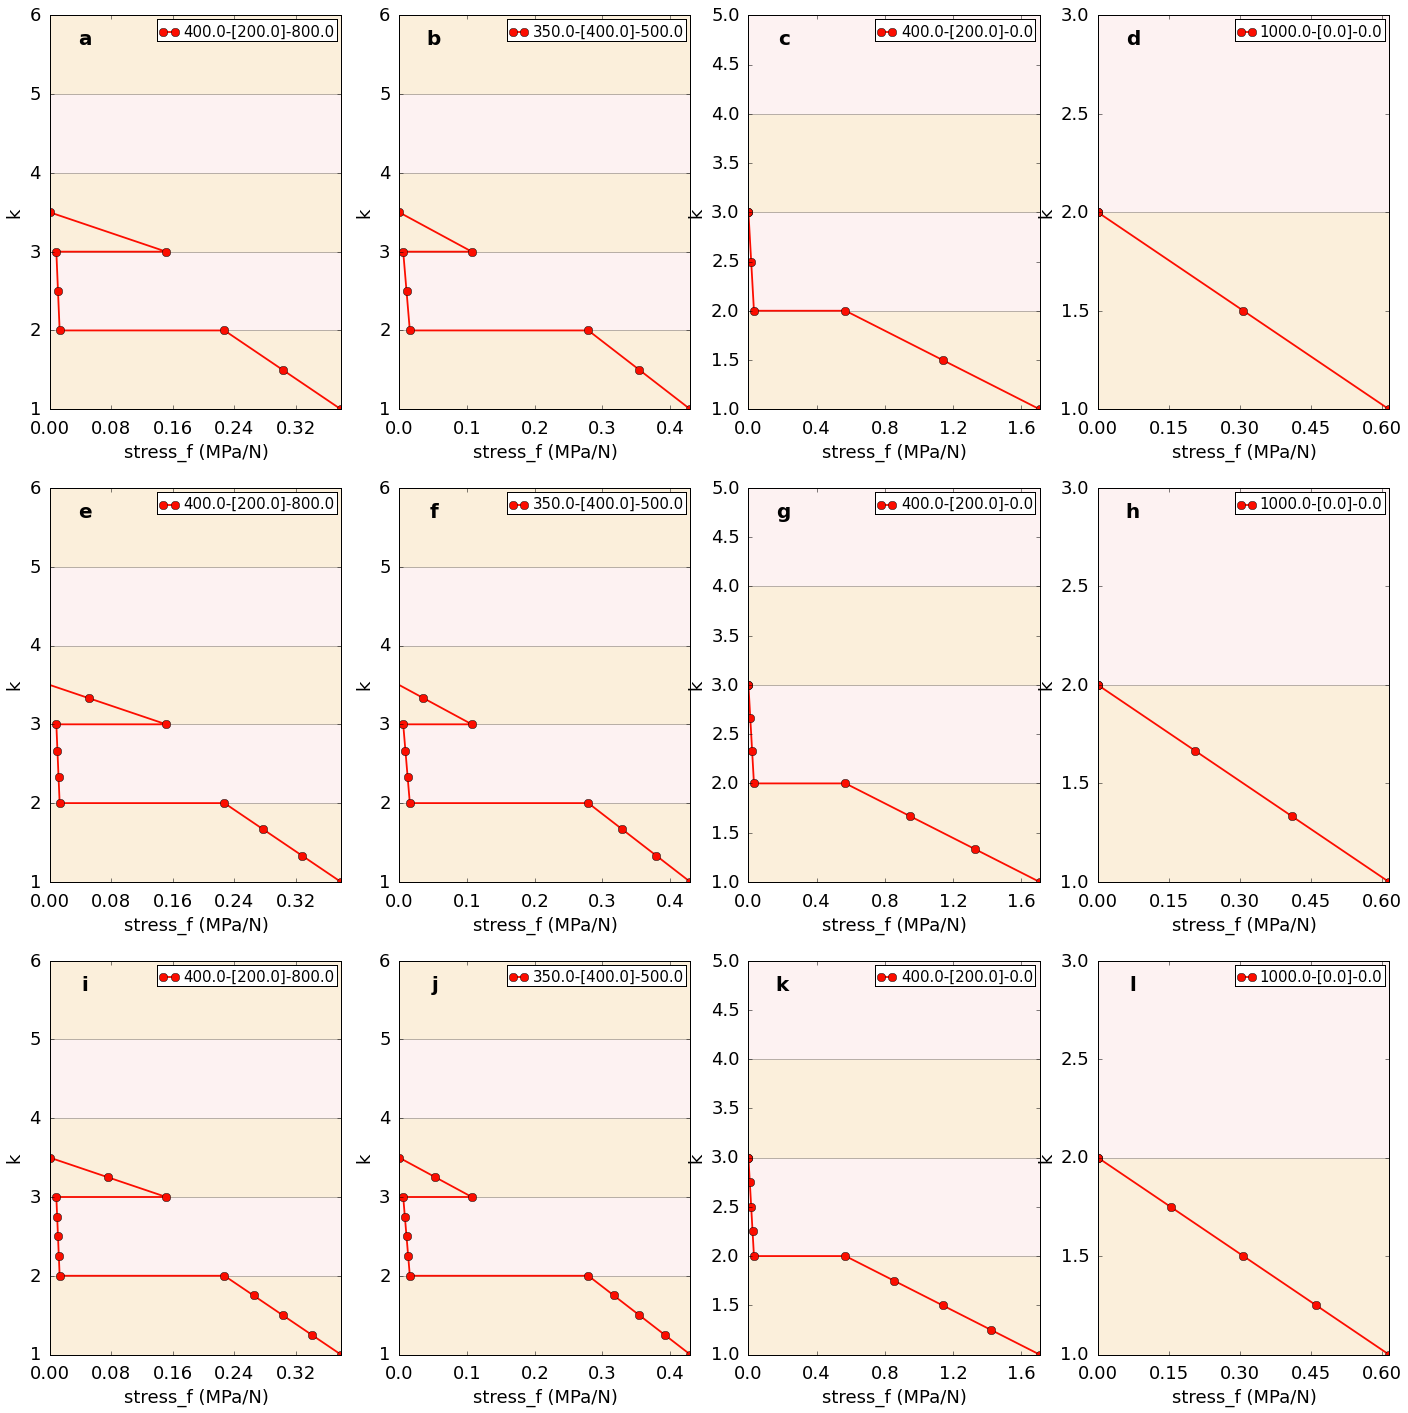

In [131]:
cases1.plot(extrema=False)

Each caselet can also be a separate case, plotting multiple geometries for each as accomplished with `Case`.

In [132]:
const_total = ['350-400-500',  '400-200-800', '200-200-1200',
               '200-100-1400', '100-100-1600', '100-200-1400',]
const_outer = ['400-550-100', '400-500-200', '400-450-300',
               '400-400-400', '400-350-500', '400-300-600',
               '400-250-700', '400-200-800', '400-0.5-1199']
const_inner = ['400-400-400', '350-400-500', '300-400-600',
               '200-400-700', '200-400-800', '150-400-990',
               '100-400-1000', '50-400-1100',]
const_middle = ['100-700-400', '150-650-400', '200-600-400',
                '250-550-400', '300-400-500', '350-450-400',
                '400-400-400', '450-350-400', '750-0.5-400']

case1_ = const_total
case2_ = const_outer
case3_ = const_inner
case4_ = const_middle

cases_ = [case1_, case2_, case3_, case4_]

In [133]:
cases3 = la.distributions.Cases(cases_, load_params=load_params,
                                mat_props=mat_props, model= 'Wilson_LT',
                                ps=[2,3]) 

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


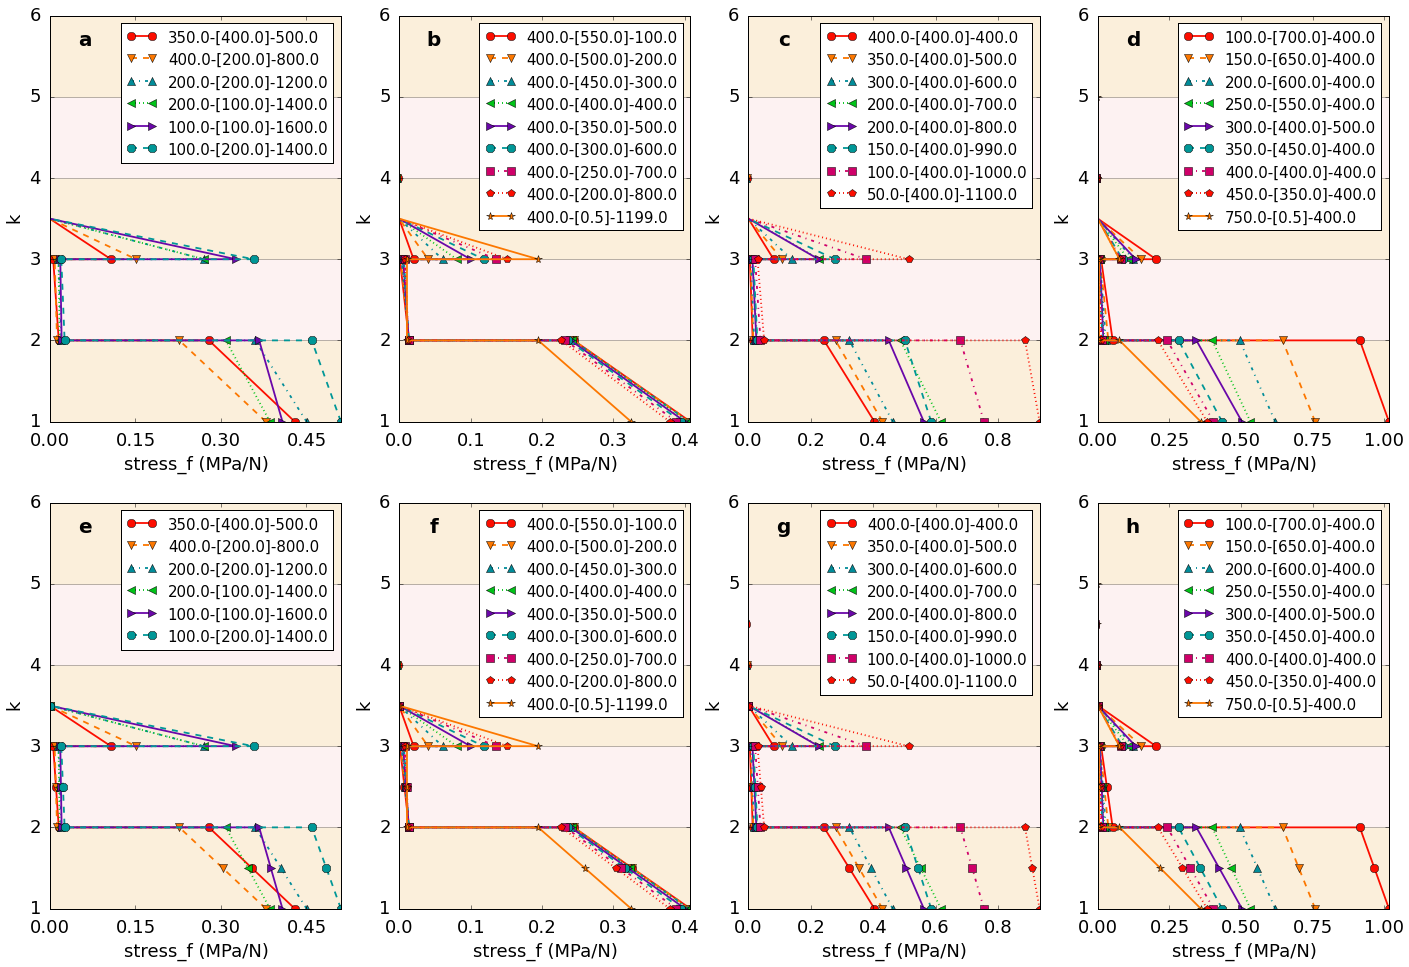

In [134]:
cases3.plot(extrema=False)

See Demo notebooks for more examples of plotting.

---

## More on Cases

In [ ]:
'''Fix importing cases'''

In [ ]:
from lamana.distributions import Cases

#####Applying caselets 

The term "caselet" is defined in LPEP 003.  Most importantly, the various types a caselet represents is handled by `Cases` and discussed here.  In 0.4.4b3+, caselets are contained in lists.  LPEP entertains the idea of containing caselets in dicts.

In [147]:
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

%matplotlib inline


str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']
list_caselets = [['400-400-400', '400-[400]-400'],
                 ['200-100-1400', '100-200-1400',], 
                 ['400-400-400', '400-200-800','350-400-500',], 
                 ['350-400-500']] 
case1 = la.distributions.Case(dft.load_params, dft.mat_props)
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case3 = la.distributions.Case(dft.load_params, dft.mat_props)
case1.apply(['400-200-800', '400-[200]-800'])
case2.apply(['350-400-500', '400-200-800'])
case3.apply(['350-400-500', '400-200-800', '400-400-400'])
case_caselets = [case1, case2, case3]
mixed_caselets = [['350-400-500', '400-200-800',],
                  [['400-400-400', '400-[400]-400'],
                   ['200-100-1400', '100-200-1400',]], 
                  [case1, case2,]
                 ]  
dict_caselets = {0: ['350-400-500',  '400-200-800', '200-200-1200',
                     '200-100-1400', '100-100-1600', '100-200-1400'],
                 1: ['400-550-100', '400-500-200', '400-450-300',
                     '400-400-400', '400-350-500', '400-300-600'],
                 2: ['400-400-400', '350-400-500', '300-400-600',
                     '200-400-700', '200-400-800', '150-400-990'],
                 3: ['100-700-400', '150-650-400', '200-600-400',
                     '250-550-400', '300-400-500', '350-450-400'], 
                 }

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


In [148]:
cases = Cases(str_caselets)
#cases = Cases(str_caselets, combine=True)
#cases = Cases(list_caselets)
#cases = Cases(list_caselets, combine=True)
#cases = Cases(case_caselets)
#cases = Cases(case_caselets, combine=True)                 # collapse to one plot
#cases = Cases(str_caselets, ps=[2,5])
#cases = Cases(list_caselets, ps=[2,3,5,7])
#cases = Cases(case_caselets, ps=[2,5])
#cases = Cases([], combine=True)                            # test raises


# For next versions
#cases = Cases(dict_caselets)
#cases = Cases(mixed_caselets)
#cases = Cases(mixed_caselets, combine=True) 
cases

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


<__main__.Cases object at 0x000000000ACA3978>, {0: <<class 'lamana.distributions.Case'> p=5, size=1>, 1: <<class 'lamana.distributions.Case'> p=5, size=1>, 2: <<class 'lamana.distributions.Case'> p=5, size=1>}

In [149]:
cases.LMs

[<lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

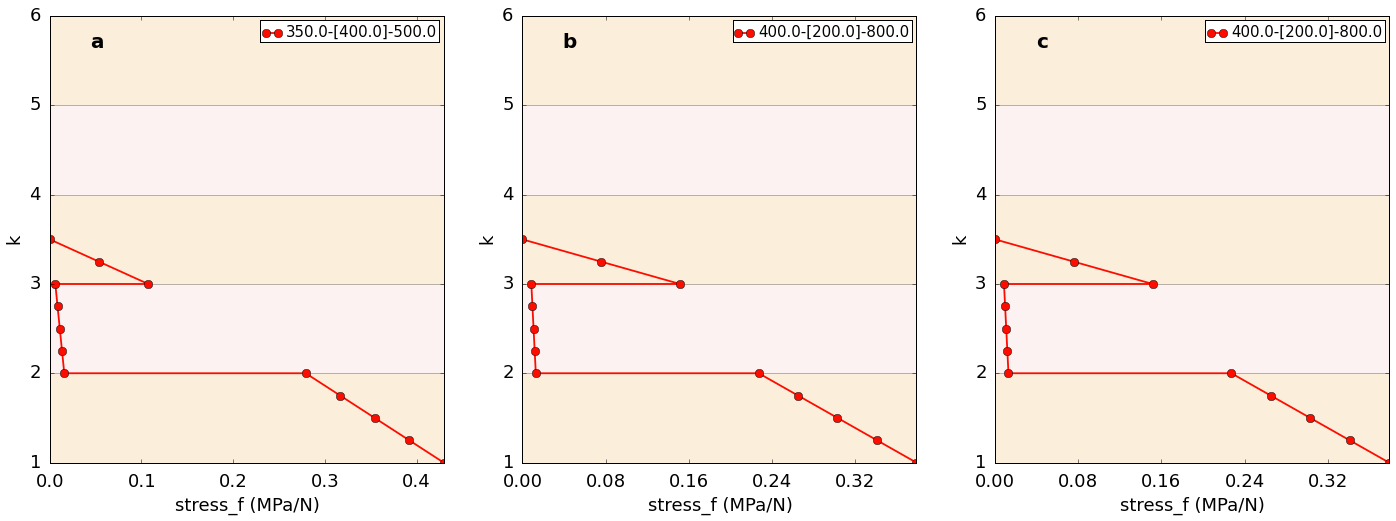

In [150]:
#cases.plot()
#cases.plot(normalized=False)
#cases.plot(colorblind=True, grayscale=True)
cases.plot(extrema=False)                                   # needed to see ps 

In [151]:
cases.caselets

['350-400-500', '400-200-800', '400-[200]-800']

In [152]:
'''get out tests from code'''
'''run tests'''
'''test set seletions'''

'test set seletions'

#####Characteristics

In [153]:
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
cases = Cases(dft.geo_inputs['5-ply'], ps=[2,3,4])

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


In [154]:
len(cases)                                                 # test __len__

9

In [155]:
cases.get(1)                                               # __getitem__

<<class 'lamana.distributions.Case'> p=2, size=1>

In [156]:
#cases[2] = 'test'                                         # __setitem__; not implemented

In [157]:
cases[0]                                                   # select

<<class 'lamana.distributions.Case'> p=2, size=1>

In [158]:
cases[0:2]                                                 # slice (__getitem__)   

[<<class 'lamana.distributions.Case'> p=2, size=1>,
 <<class 'lamana.distributions.Case'> p=2, size=1>]

In [159]:
del cases[1]                                               # __delitem__ 

In [160]:
cases                                                      # test __repr__ 

<__main__.Cases object at 0x000000000993C438>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [161]:
print(cases)                                               # test __str__    

{0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}


In [162]:
cases == cases                                             # test __eq__               

True

In [163]:
not cases != cases                                         # test __ne__ 

True

In [164]:
for i, case in enumerate(cases):                           # __iter__ values
    print(case)
    #print(case.LMs)

<<class 'lamana.distributions.Case'> p=2>
<<class 'lamana.distributions.Case'> p=2>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>


In [165]:
cases.LMs                                                  # peek inside cases

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=2>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=4>]

In [166]:
cases

<__main__.Cases object at 0x000000000993C438>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [167]:
#cases.to_csv()                                             # write to file

#####Unique Cases from Intersecting Caselets

`Cases` can check if caselet is unique by comparing the underlying geometry strings.  Here we have a non-unique caselets of different types.  We get unique results *within each caselet* using the `unique` keyword.  Notice, different caselets could have similar LaminateModels.

In [168]:
str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']
str_caselets2 = [['350-400-500', '350-[400]-500'],  
                 ['400-200-800', '400-[200]-800']]
list_caselets = [['400-400-400', '400-[400]-400'],
                 ['200-100-1400', '100-200-1400',], 
                 ['400-400-400', '400-200-800','350-400-500',], 
                 ['350-400-500']] 
case1 = la.distributions.Case(dft.load_params, dft.mat_props)
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case3 = la.distributions.Case(dft.load_params, dft.mat_props)
case1.apply(['400-200-800', '400-[200]-800'])
case2.apply(['350-400-500', '400-200-800'])
case3.apply(['350-400-500', '400-200-800', '400-400-400'])
case_caselets = [case1, case2, case3]

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


In [169]:
def process_cases(cases_):
    for i, case in enumerate(cases_):
        print('Case #: {}'.format(i)) 
        for LM in case.LMs:
            print(' {0}: {1:>4}'.format('LaminateModel', LM))

In [170]:
cases3 = Cases(str_caselets2, unique=True)
process_cases(cases3)

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


In [171]:
cases3 = Cases(list_caselets, unique=True)
process_cases(cases3)

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>
 LaminateModel: <lamana LaminateModel object (100.0-[200.0]-1400.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 3
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>


In [172]:
cases3 = Cases(case_caselets, unique=True)
process_cases(cases3)

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>


**Gotcha**: A single list of individual geometry strings is actually only one case.  

`str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']`

Since `Cases` is designed to produce multiple cases, it will create a separate subplot for each string by default.  When `unique=True`, since individual strings are already unique sets, `Cases` returns that same geometry.  No operation is performed, so a warning is prompted.

In [173]:
cases3 = Cases(str_caselets, unique=True)
process_cases(cases3)

Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
Single geometry string detected. unique not applied. See combine=True keyword.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


If it is desired to combine such a list into one plot, a convenient `combine` keyword is available if `Cases` is already loaded with parameters, but it is best to use `Case`.  The `unique` option is available and internally uses the native `Case(unique=True)` keyword.

In [174]:
cases3 = Cases(str_caselets, combine=True)
process_cases(cases3)

User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


In [175]:
cases3 = Cases(str_caselets, combine=True, unique=True)
process_cases(cases3)

User input geometries have been converted and set to Case.
Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


It is important to note that once set operations are performed, order is no longer a preserved.  This is related to how Python handles hashes.  This applies to `Cases()` in two areas:

- The `unique` keyword optionally invoked during instantiation.
- Any use of set operation via the `how` keyword within the `Cases.select()` method.

#####Revamped Idioms

**Gotcha**: Although a `Cases` instance is a dict, as if 0.4.4b3, it's `__iter__` method has been overriden to iterate the values by default (not the keys as in Python).  This choice was decided since keys are uninformative integers, while the values (curently cases )are of interest, which saves from typing .items() when interating a `Cases` instance.  

```python
    >>> cases = Cases()
    >>> for i, case in cases.items()                       # python
    >>> ... print(case)
    >>> for case in cases:                                 # modified
    >>> ... print(case)
```
This behavior may change in future versions.


In [176]:
#----------------------------------------------------------+

In [177]:
# Iterating Over Cases
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

In [178]:
# Multiple cases, Multiple LMs
cases = Cases(dft.geos_full, ps=[2,5])                    # two cases (p=2,5)
for i, case in enumerate(cases):                          # iter case values()
    print('Case #:', i)
    for LM in case.LMs:
        print(LM)
        
print("\nYou iterated several cases (ps=[2,5]) comprising many LaminateModels.")

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
Case #: 0
<lamana LaminateModel object (0.0-[0.0]-2000.0

In [179]:
# A single case, single LM
cases = Cases(['400-[200]-800'])                          # a single case and LM (manual)
for i, case_ in enumerate(cases):                         # iter i and case
    for LM in case_.LMs:
        print(LM)

print("\nYou processed a case and LaminateModel w/iteration.  (Recommended)\n")

User input geometries have been converted and set to Case.
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>

You processed a case and LaminateModel w/iteration.  (Recommended)



In [180]:
# Single case, multiple LMs
cases = Cases(dft.geos_full)                              # auto, default p=5
for case in cases:                                        # iter case values()
    for LM in case.LMs:
        print(LM)
        
print("\nYou iterated a single case of many LaminateModels.")

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>

You iterated a single case of many LaminateModels.


#####Selecting

From cases, subsets of LaminateModels can be chosen.  `select` is a method that performs on and returns sets of LaminateModels.  Plotting functions are not implement for this method directly, however the reulsts can be used to make new cases instances from which `.plot()` is accessible.   Example access techniques using `Cases`.

- Access all cases : `cases`
- Access specific cases : `cases[0:2]`
- Access all LaminateModels : `cases.LMs`
- Access LaminateModels (within a case) : `cases.LMs[0:2]`
- Select a subset of LaminateModels from all cases : `cases.select(ps=[3,4])`

In [181]:
# Iterating Over Cases
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

In [182]:
#geometries = set(dft.geos_symmetric).union(dft.geos_special + dft.geos_standard + dft.geos_dissimilar)
#cases = Cases(geometries, ps=[2,3,4])
cases = Cases(dft.geos_special, ps=[2,3,4])

# Reveal the full listdft.geos_specia
# for case in cases:                                        # iter case values()
#     for LM in case.LMs:
#         print(LM)

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.


In [183]:
# Test union of lists
#geometries

In [184]:
cases

<__main__.Cases object at 0x0000000008931828>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 1: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=2, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=3, size=1>, 7: <<class 'lamana.distributions.Case'> p=3, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>, 9: <<class 'lamana.distributions.Case'> p=4, size=1>, 10: <<class 'lamana.distributions.Case'> p=4, size=1>, 11: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [185]:
'''Right now a case shares p, size.  cases share geometries and size.'''

'Right now a case shares p, size.  cases share geometries and size.'

In [186]:
cases[0:2]

[<<class 'lamana.distributions.Case'> p=2, size=1>,
 <<class 'lamana.distributions.Case'> p=2, size=1>]

In [187]:
'''Hard to see where these comem from.  Use dict?'''

'Hard to see where these comem from.  Use dict?'

In [188]:
cases.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>]

In [189]:
cases.LMs[0:6:2]
cases.LMs[0:4]

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>]

Selections from latter cases.

In [190]:
cases.select(nplies=[2,4])  

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>}

In [191]:
cases.select(ps=[2,4])                                  

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>}

In [192]:
cases.select(nplies=4)   

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [193]:
cases.select(ps=3)    

{<lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>}

#####Advanced techniques: multiple selections.  

Set operations have been implemented in the selection method of `Cases` which enables filtering of unique LaminateModels that meet given conditions for `nplies` and `ps`.

- union: all LMs that meet either conditions (or)
- intersection: LMs that meet both conditions (and)
- difference: LMs 
- symmetric difference:

In [194]:
cases.select(nplies=4, ps=3)                             # union; default

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>}

In [195]:
cases.select(nplies=4, ps=3, how='intersection')         # intersection

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>}

By default, difference is subtracted as `set(ps) - set(nplies)`.  Currently there is no implementation for the converse difference, but set operations still work.

In [196]:
cases.select(nplies=4, ps=3, how='difference')          # difference

{<lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>}

In [197]:
cases.select(nplies=4) - cases.select(ps=3)             # set difference 

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [198]:
'''How does this work?'''

'How does this work?'

In [199]:
cases.select(nplies=4, ps=3, how='symm diff')          # symm difference

{<lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [200]:
cases.select(nplies=[2,4], ps=[3,4], how='union')  

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>}

In [201]:
cases.select(nplies=[2,4], ps=[3,4], how='intersection')  

{<lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>}

In [202]:
cases.select(nplies=[2,4], ps=3, how='difference')   

{<lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>}

In [203]:
cases.select(nplies=4, ps=[3,4], how='symmeric difference')

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>}

Current logic seems to return a union.

#####Enhancing selection algorithms with set operations

Need logic to append LM for the following:

- all, either, neither (and, or, not or)
    - a, b are int
    - a, b are list
    - a, b are mixed
    - b, a are mixed

In [204]:
import numpy as np
a = []
b = 1
c = np.int64(1)
d = [1,2]
e = [1,2,3]
f = [3,4]

test = 1

test in a
#test in b
#test is a
test is c
# if test is a or test is c:
#     True

False

In [205]:
from lamana.utils import tools as ut
ut.compare_set(d, e)
ut.compare_set(b, d, how='intersection')
ut.compare_set(d, b, how='difference')
ut.compare_set(e, f, how='symmertric difference')
ut.compare_set(d, e, test='issubset')
ut.compare_set(e, d, test='issuperset')
ut.compare_set(d, f, test='isdisjoint')

True

In [206]:
set(d) ^ set(e)
ut.compare_set(d,e, how='symm')

{3}

In [207]:
g1 = dft.Geo_objects['5-ply'][0]
g2 = dft.Geo_objects['5-ply'][1]

In [208]:
cases = Cases(dft.geos_full, ps=[2,5])                    # two cases (p=2,5)
for i, case in enumerate(cases):                          # iter case values()
    for LM in case.LMs:
        print(LM)

User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
User input geometries have been converted and set to Case.
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>
<l

In order to compare objects in sets, they must be hashable. The simple requirement equality is include whatever makes the hash of a equal to the hash of b.  Ideally, we should hash the Geometry object, but the inner values is a list which is unhashable due to its mutability.  Conventiently however, strings are not hashable.  We can try to hash the geometry input string once they have been converted to General Convention as unique identifiers for the geometry object.  This requires some reorganization in `Geometry`.

- ~~isolate a converter function `_to_gen_convention()`~~
- privative all functions invisible to the API
- ~~hash the converted `geo_strings`~~
- ~~privatize `_geo_strings`.  This cannot be altered by the user.~~

Here we see the advantage to using geo_strings as hashables.  They are inheirently hashable.

UPDATE: decided to make a hashalbe version of the `GeometryTuple`

In [209]:
hash('400-200-800')

-2869142249553393609

In [210]:
hash('400-[200]-800')

6527545713534471343

Need to make `Laminate` class hashable.  Try to use unique identifiers such as Geometry and p.

In [211]:
hash((case.LMs[0].Geometry, case.LMs[0].p))

1570369202565922880

In [212]:
case.LMs[0]

<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>

In [213]:
L = [LM for case in cases for LM in case.LMs]

In [214]:
L[0]

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>

In [215]:
L[8]

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>

In [216]:
hash((L[0].Geometry, L[0].p))

4636833212297578389

In [217]:
hash((L[1].Geometry, L[1].p))

5861696211961991069

In [218]:
set([L[0]]) != set([L[8]])

True

Use sets to filter unique geometry objects from `Defaults()`.

In [219]:
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()

mix = dft.Geos_full + dft.Geos_all

In [220]:
mix

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (0.0-[0.0]-2000.0),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0)

In [221]:
set(mix)

{Geometry object (1000.0-[0.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0]-800.0),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (0.0-[0.0]-2000.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S)}

### Mixing

See above.  Looks like comparing the order of these lists give different results. This test has been quarantine from the repo until a solution is found.

In [227]:
mix = dft.geos_most + dft.geos_standard                   # 400-[200]-800 common to both 
cases3a = Cases(mix, combine=True, unique=True)
cases3a.LMs

User input geometries have been converted and set to Case.


[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

In [228]:
load_params['p'] = 5
cases3b5 = la.distributions.Case(load_params, dft.mat_props)
cases3b5.apply(mix) 

User input geometries have been converted and set to Case.


In [229]:
cases3b5.LMs[:-1]

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

## Case Idioms

As we transition to more automated techniques, tf parameters are to be reused multiple times, it can be helpful to store them as default values.

In [280]:
'''Add how to build Defaults()'''

'Add how to build Defaults()'

In [281]:
# Case Building from Defaults
import lamana as la
from lamana.utils import tools as ut
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
##dft = ut.Defaults()                                        # user-definable
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case2.apply(dft.geos_full)                                 # multi plies
#LM = case2.LMs[0]
#LM.LMFrame
print("\nYou have built a case using user-defined defaults to set geometric \
loading and material parameters.")
case2

User input geometries have been converted and set to Case.

You have built a case using user-defined defaults to set geometric loading and material parameters.


<<class 'lamana.distributions.Case'> p=5, size=8>

Finally, if building several cases is required for the same parameters, we can use higher-level API tools to help automate the process.  

*Note, for every case that is created, a seperate `Case()` instantiation and `Case.apply()` call is required.  These techniques obviate such redundancies.*

In [282]:
# Automatic Case Building
import lamana as la
from lamana.utils import tools as ut

#Single Case
dft = wlt.Defaults()
##dft = ut.Defaults()
case3 = ut.laminator(dft.geos_full)                       # auto, default p=5
case3 = ut.laminator(dft.geos_full, ps=[5])               # declared
#case3 = ut.laminator(dft.geos_full, ps=[1])               # LFrame rollbacks
print("\nYou have built a case using higher-level API functions.")
case3

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.

You have built a case using higher-level API functions.


{0: <<class 'lamana.distributions.Case'> p=5, size=8>}

In [283]:
# How to get values from a single case (Python 3 compatible)
list(case3.values())

[<<class 'lamana.distributions.Case'> p=5, size=8>]

Cases are differentiated by different ps.

In [284]:
# Multiple Cases
cases1 = ut.laminator(dft.geos_full, ps=[2,3,4,5])         # multi ply, multi p   
print("\nYou have built many cases using higher-level API functions.")
cases1

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.

You have built many cases using higher-level API functions.


{0: <<class 'lamana.distributions.Case'> p=2, size=8>,
 1: <<class 'lamana.distributions.Case'> p=3, size=8>,
 2: <<class 'lamana.distributions.Case'> p=4, size=8>,
 3: <<class 'lamana.distributions.Case'> p=5, size=8>}

In [285]:
# How to get values from multiple cases (Python 3 compatible)
list(cases1.values())

[<<class 'lamana.distributions.Case'> p=2, size=8>,
 <<class 'lamana.distributions.Case'> p=3, size=8>,
 <<class 'lamana.distributions.Case'> p=4, size=8>,
 <<class 'lamana.distributions.Case'> p=5, size=8>]

Python 3 no longer returns a list for `.values()` method, so list used to evalate a the dictionary view.  While consuming a case's, dict value view with `list()` works in Python 2 and 3, iteration with loops and comprehensions is a preferred technique for both single and mutiple case processing. After cases are accessed, iteration can access the contetnts of all cases.  Iteration is the preferred technique for processing cases.  It is most general, cleaner, Py2/3 compatible out of the box and agrees with The Zen of Python:

> There should be one-- and preferably only one --obvious way to do it.

In [286]:
# Iterating Over Cases
# Latest style
case4 = ut.laminator(['400-[200]-800'])                   # a sinle case and LM
for i, case_ in case4.items():                            # iter p and case
    for LM in case_.LMs:
        print(LM)

print("\nYou processed a case and LaminateModel w/iteration.  (Recommended)\n")
        
case5 = ut.laminator(dft.geos_full)                       # auto, default p=5
for i, case in case5.items():                             # iter p and case with .items()
    for LM in case.LMs:
        print(LM)
        
for case in case5.values():                               # iter case only with .values() 
    for LM in case.LMs:
        print(LM)

print("\nYou processed many cases using Case object methods.")

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>

You processed a case and LaminateModel w/iteration.  (Recommended)

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0

In [287]:
# Convert case dict to generator
case_gen1 = (LM for p, case in case4.items() for LM in case.LMs)

# Generator without keys
case_gen2 = (LM for case in case4.values() for LM in case.LMs)

print("\nYou have captured a case in a generator for later, one-time use.")


You have captured a case in a generator for later, one-time use.


We will demonstrate comparing two techniques for generating equivalent cases.

In [290]:
# Style Comparisons
dft = wlt.Defaults()
##dft = ut.Defaults()

case1 = la.distributions.Case(load_params, mat_props) 
case1.apply(dft.geos_all)

cases = ut.laminator(geos=dft.geos_all)
case2 = cases

# Equivalent calls
print(case1)
print(case2)

print("\nYou have used classic and modern styles to build equivalent cases.")

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
<<class 'lamana.distributions.Case'> p=5>
{0: <<class 'lamana.distributions.Case'> p=5, size=18>}

You have used classic and modern styles to build equivalent cases.


In [ ]:
'''Add Cases idioms'''